## 2.4 Model Selection 소개
### 학습/테스트 데이터 셋 분리 – train_test_split()

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data) # 예측을 테스트 데이터로해야지, 학습데이터로 하면 무조건 100%나온다.
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test,y_train, y_test= train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121)

In [10]:
X_train[:3], X_test[:3] # 학습용 데이터셋, 테스트용 데이터 셋

(array([[6.3, 2.8, 5.1, 1.5],
        [6.8, 3.2, 5.9, 2.3],
        [4.8, 3.4, 1.9, 0.2]]),
 array([[7. , 3.2, 4.7, 1.4],
        [6.2, 3.4, 5.4, 2.3],
        [6. , 3.4, 4.5, 1.6]]))

In [17]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
print(f'예측 정확도: {accuracy_score(y_test,pred):.4f}')

예측 정확도: 0.9556


### 사이킷런 쓸때, numpy가 디폴트지만, 판다스도 가능!
넘파이 ndarray 뿐만 아니라 판다스 DataFrame/Series도 train_test_split( )으로 분할 가능

In [18]:
import pandas as pd

iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target']=iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
ftr_df = iris_df.iloc[:, :-1]
tgt_df = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(ftr_df, tgt_df, 
                                                    test_size=0.3, random_state=121)

In [20]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [28]:
display(X_train[:2])
display(X_test[:2])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
133,6.3,2.8,5.1,1.5
143,6.8,3.2,5.9,2.3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
50,7.0,3.2,4.7,1.4
148,6.2,3.4,5.4,2.3


In [32]:
y_train_df = pd.DataFrame(y_train)
print(y_train[:3])
display(y_train_df[:3])

133    2
143    2
24     0
Name: target, dtype: int64


,target
133,2
143,2
24,0


In [33]:
y_test_df = pd.DataFrame(y_test)
print(y_test[:3])
display(y_test_df[:3])

50     1
148    2
85     1
Name: target, dtype: int64


,target
50,1
148,2
85,1


In [31]:
dt_clf = DecisionTreeClassifier( )
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print(f"예측 정확도 : {accuracy_score(y_test,pred):.4f}")

예측 정확도 : 0.9556


#### fit과 accuracy_score에 시리즈 말고 데이터프레임 들어가도 작동한다.

In [34]:
dt_clf = DecisionTreeClassifier( )
dt_clf.fit(X_train, y_train_df)
pred = dt_clf.predict(X_test)
print(f"예측 정확도 : {accuracy_score(y_test_df,pred):.4f}")

예측 정확도 : 0.9556


### 교차 검증

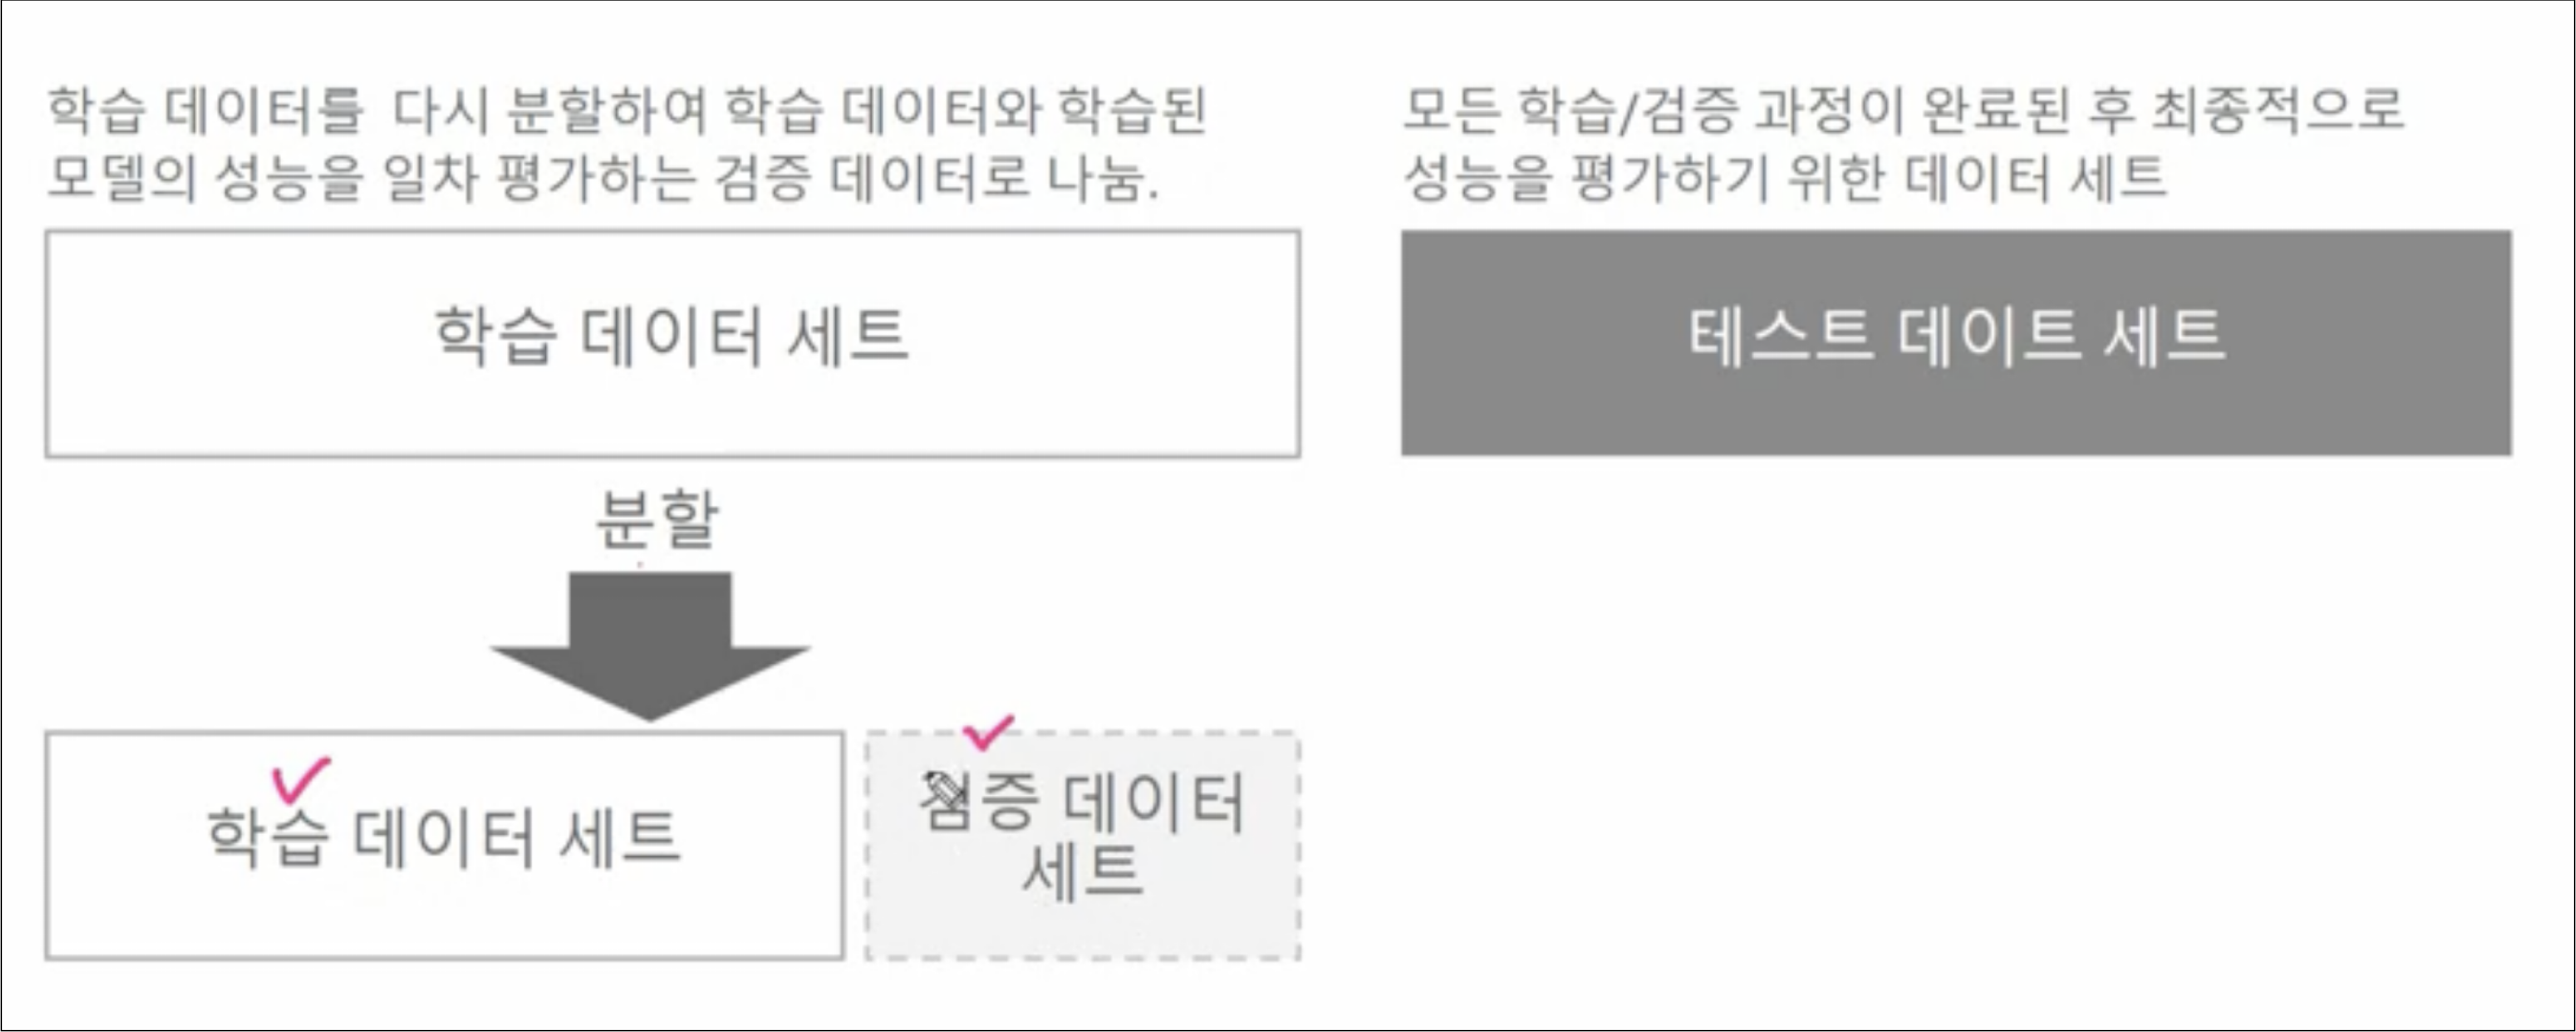

#### K 폴드 교차검증
- K=5 폴드 교차검증 최종 평가는 5번 나눠서 학습, 검증한것의 **평균**으로 한다.

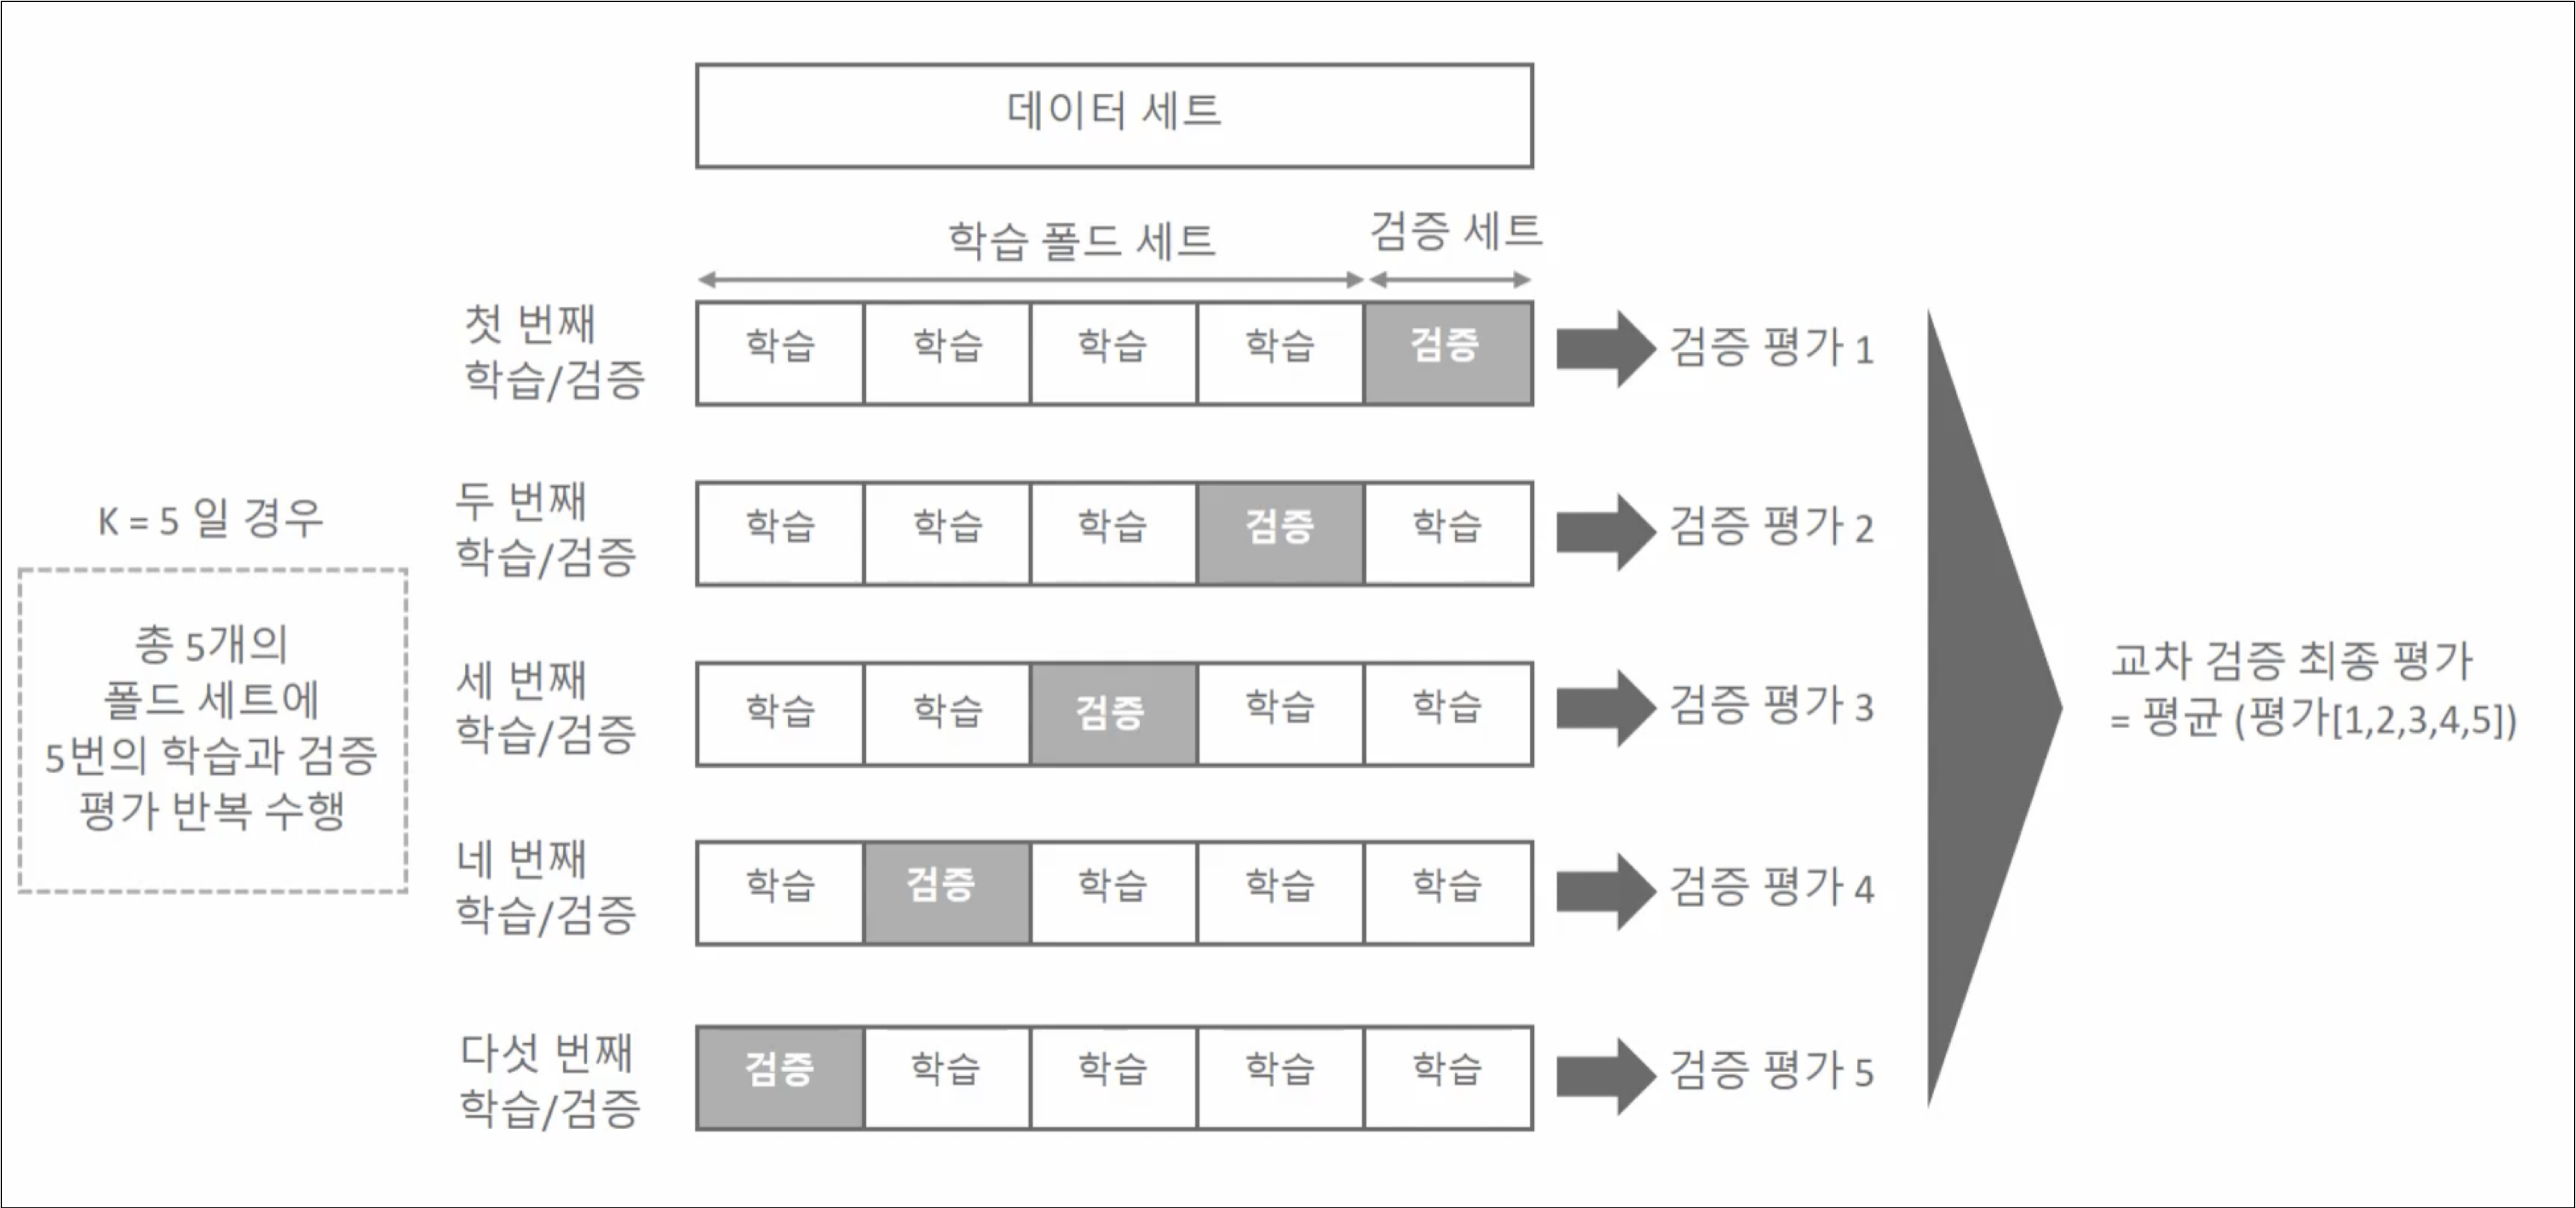

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

In [36]:
iris = load_iris()

In [38]:
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=11)

In [42]:
# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
print(f"붓꽃 데이터 세트 크기 {iris.data.shape[0]}")

붓꽃 데이터 세트 크기 150


In [93]:
cv_accuracy=[]
summary = lambda x: f"{x[:3]}...{x[-3:]}"

n_iter = 0
# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_idx, test_idx in kfold.split(features):
    n_iter+=1
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    ## 학습용, 검증용 데이터
    X_train, X_test = iris.data[train_idx], iris.data[test_idx]
    ## 학습용, 검증용 정답(라벨)
    y_train, y_test = iris.target[train_idx], iris.target[test_idx]

    ## 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    ## 반복 마다 정확도 측정
    acc = np.round(accuracy_score(y_test,pred),4)
    cv_accuracy+=[acc] # 정확도 추가
    
    ## 학습과정 출력
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f"#{n_iter} 교차 검증 정확도: {acc}, 학습 데이터 크기: {train_size}, 검증 데이터 크기: {test_size}")
    print(f"학습 데이터 인덱스 : {summary(train_idx)}")
    print(f"검증 데이터 인덱스 : {summary(test_idx)}\n")

#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
학습 데이터 인덱스 : [30 31 32]...[147 148 149]
검증 데이터 인덱스 : [0 1 2]...[27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
학습 데이터 인덱스 : [0 1 2]...[147 148 149]
검증 데이터 인덱스 : [30 31 32]...[57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
학습 데이터 인덱스 : [0 1 2]...[147 148 149]
검증 데이터 인덱스 : [60 61 62]...[87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
학습 데이터 인덱스 : [0 1 2]...[147 148 149]
검증 데이터 인덱스 : [90 91 92]...[117 118 119]

#5 교차 검증 정확도: 0.8333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
학습 데이터 인덱스 : [0 1 2]...[117 118 119]
검증 데이터 인덱스 : [120 121 122]...[147 148 149]



In [97]:
print(cv_accuracy)
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print(f"##평균 검증 정확도 : {np.mean(cv_accuracy)}")

[1.0, 0.9667, 0.8667, 0.9333, 0.8333]
##평균 검증 정확도 : 0.9200000000000002


#### Stratified K 폴드
- 일반 K 폴드가 그냥 규형있게 1/5씩 나눠서 교차검증 하는 것이라면, Stratified K 폴드는 **불균형한 레이블 분포**를 가진 데이터를 학습할 때 사용한다. (주로 Stratified 많이 쓴다.)
- 이유 : 신용카드 사기건을 학습한다고 해보자. 2만건의 거래가있고, 사기는 100건정도이다. 즉, 정상거래가 19900건이고, 이것을 단순히 5등분하게되면 사기건은 학습이 거의 안되게 분할될 확률이 매우 높다.
- **원리** : 학습데이터와 검증데이터가 가지는 **레이블의 분포도가 유사하도록 나누는 원리**

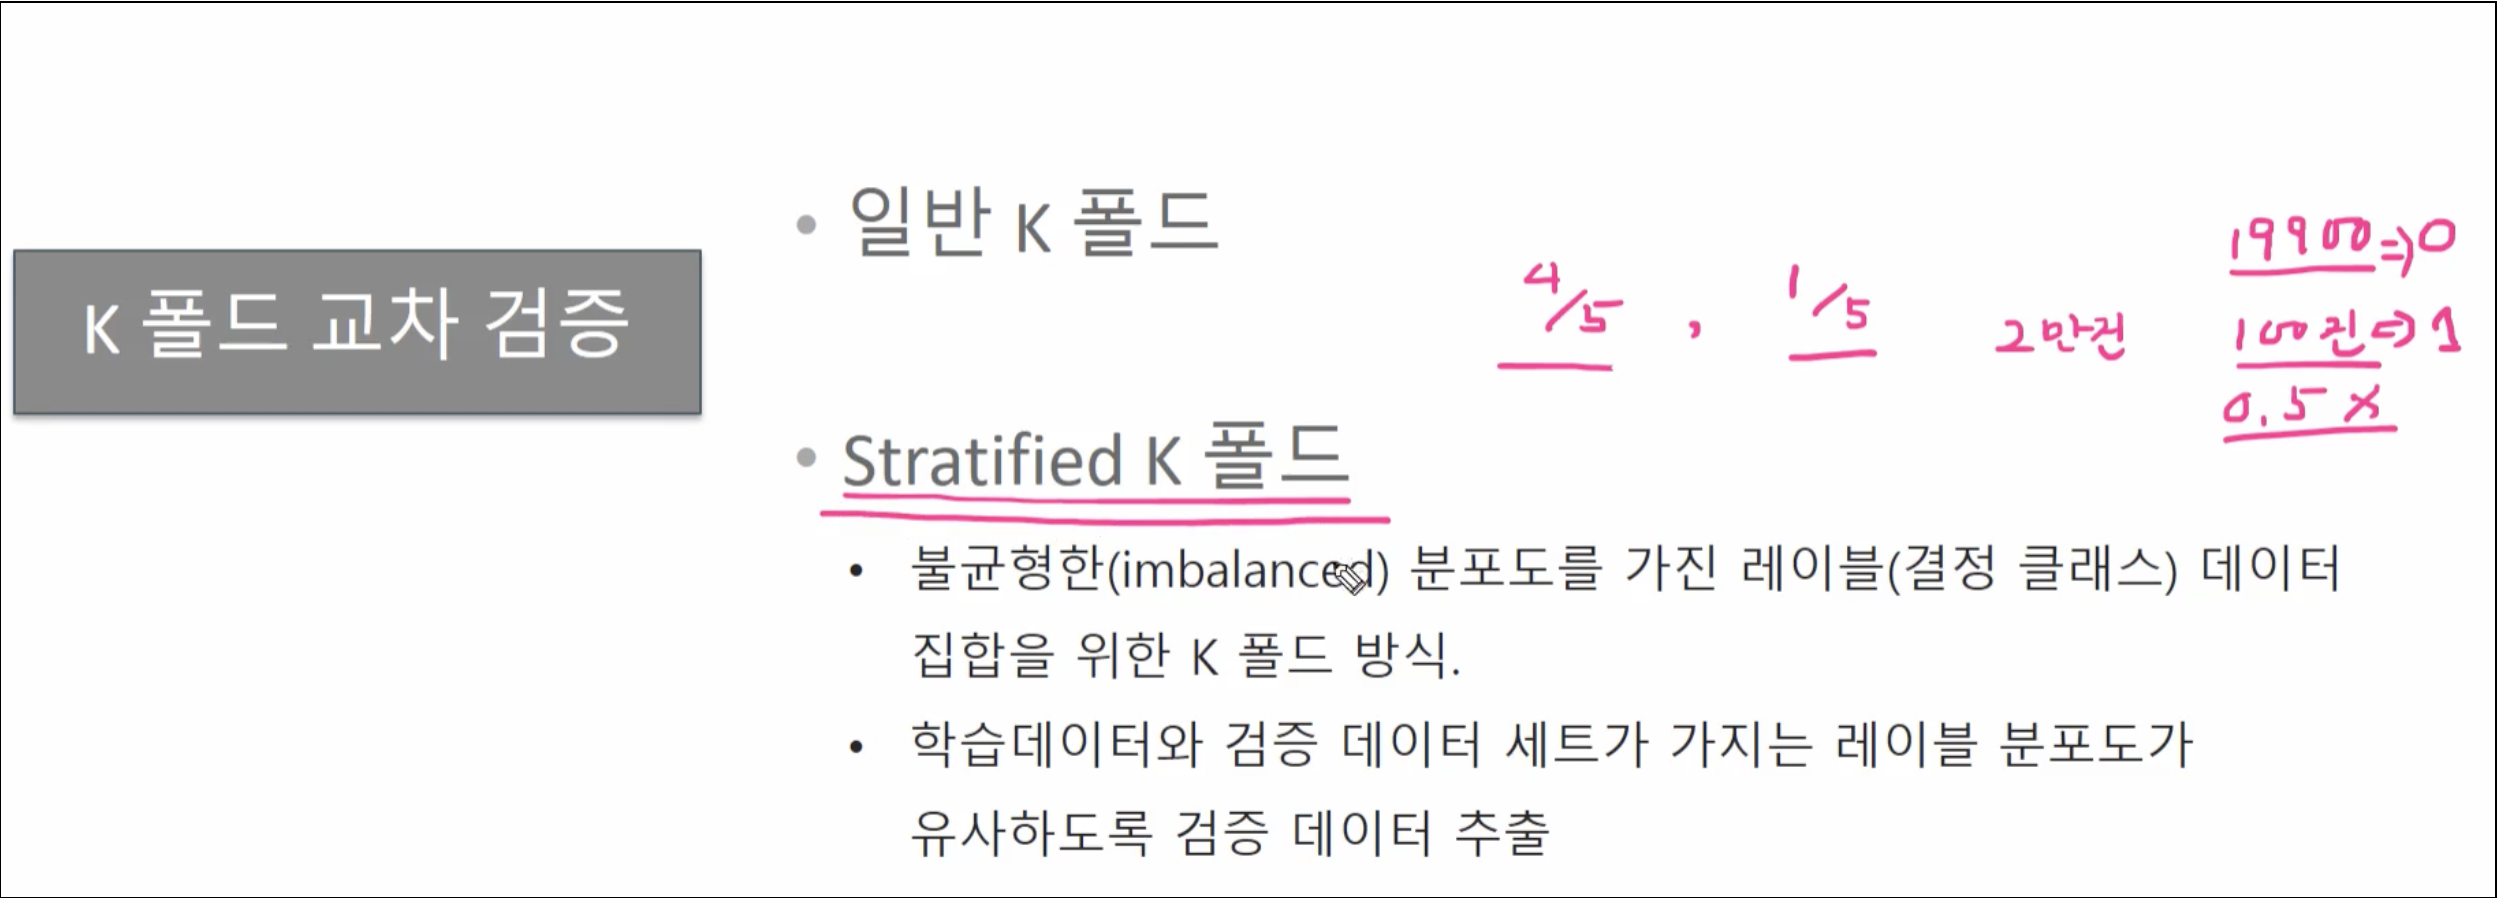

In [123]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [140]:
iris_df['label'].value_counts() ## label 분포 확인

0    50
1    50
2    50
Name: label, dtype: int64

In [132]:
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/검증 용 데이터의 인덱스를 반환
n_iter=0
for train_idx, test_idx in kfold.split(iris_df): # kfold.split()에 데이터프레임도 가능
    n_iter+=1
    label_train=iris_df.label.iloc[train_idx]
    label_test=iris_df.label.iloc[test_idx]
    print(f"## 교차 검증 : {n_iter}")
    print(f"학습 레이블 데이터 분포:\n{label_train.value_counts()}")
    print(f"검증 레이블 데이터 분포:\n{label_test.value_counts()}\n")
## 교차 검증 1에서 1,2 로 학습하고 0으로 테스트한다. 이건 매우 잘못된 학습, 테스트 방식이다. 영어와 국어를 공부하고 수학시험을 보는 꼴이다.
## 왜냐하면 학습한 레이블은 1,2인데 0번으로 검증을했기 때문이다.

## 교차 검증 : 1
학습 레이블 데이터 분포:
1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
0    50
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포:
0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
1    50
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포:
0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
2    50
Name: label, dtype: int64



In [141]:
iris_df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [142]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
n_iter=0

In [143]:
# 그냥 kfold.split()와 다르게 반드시 레이블값이 들어가야 그걸 기반으로 쪼갠다.
for train_idx, test_idx in skf.split(iris_df, iris_df.label): # 여기에 iris_df.label이 들어가는게 중요!
    n_iter+=1
    label_train=iris_df.label.iloc[train_idx]
    label_test=iris_df.label.iloc[test_idx]
    print(f"## 교차 검증 : {n_iter}")
    print(f"학습 레이블 데이터 분포:\n{label_train.value_counts()}")
    print(f"검증 레이블 데이터 분포:\n{label_test.value_counts()}\n")

## 교차 검증 : 1
학습 레이블 데이터 분포:
2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
0    17
1    17
2    16
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포:
1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
0    17
2    17
1    16
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포:
0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
1    17
2    17
0    16
Name: label, dtype: int64



In [151]:
iris_df.iloc[train_idx,:-1][:3]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [150]:
iris_df.iloc[train_idx,-1][:3]

0    0
1    0
2    0
Name: label, dtype: int64

##### StratifiedKFold 따라치며 커스텀해보기

In [152]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

for train_idx, test_idx in skfold.split(iris_df, iris_df.label):
    n_iter+=1
    # 이부분 내가 커스텀해서 데이터프레임으로 해봄
    ##아래가 원래 코드
#     X_train, X_test = features[train_index], features[test_index]
#     y_train, y_test = label[train_index], label[test_index]
    X_train, X_test = iris_df.iloc[train_idx,:-1], iris_df.iloc[test_idx,:-1] 
    y_train, y_test = iris_df.iloc[train_idx,-1], iris_df.iloc[test_idx,-1]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시 마다 정확도 측정
    acc = np.round(accuracy_score(y_test, pred),4)
    cv_accuracy+=[acc]
    
    # 출력
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f"#{n_iter} 교차 검증 정확도: {acc}, 학습 데이터 크기: {train_size}, 검증 데이터 크기: {test_size}")
    print(f"학습 데이터 인덱스 : {summary(train_idx)}")
    print(f"검증 데이터 인덱스 : {summary(test_idx)}\n")
    
# 교차 검증별 정확도 및 평균 정확도 계산
print(f"# 교차 검증별 정확도: {np.round(cv_accuracy,4)}")
print(f"# 평균 검증 정확도: {np.mean(cv_accuracy)}")

#1 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
학습 데이터 인덱스 : [17 18 19]...[147 148 149]
검증 데이터 인덱스 : [0 1 2]...[113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
학습 데이터 인덱스 : [0 1 2]...[147 148 149]
검증 데이터 인덱스 : [17 18 19]...[130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
학습 데이터 인덱스 : [0 1 2]...[130 131 132]
검증 데이터 인덱스 : [34 35 36]...[147 148 149]

# 교차 검증별 정확도: [0.98 0.94 0.98]
# 평균 검증 정확도: 0.9666666666666667


### cross_val_score( )

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
#print(scores, type(scores))
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

[0.98 0.94 0.98] <class 'numpy.ndarray'>
교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


* GridSearchCV

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2,3]}

In [28]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True, return_train_score=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [29]:
grid_dtree.cv_results_

{'mean_fit_time': array([0.00033339, 0.        , 0.00050179, 0.        , 0.        ,
        0.        ]),
 'std_fit_time': array([0.00047148, 0.        , 0.00040443, 0.        , 0.        ,
        0.        ]),
 'mean_score_time': array([0.00023373, 0.        , 0.        , 0.00016761, 0.        ,
        0.        ]),
 'std_score_time': array([0.00033054, 0.        , 0.        , 0.00023703, 0.        ,
        0.        ]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_sample

In [30]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 세트 정확도: 0.9667


In [31]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667
